# Øving 5 - TMA4320 - Løsning

I denne oppgaven skal du implementere Cholesky-algoritmen for å løse symmetriske positiv definitte (SPD) lineære ligningssystemer. Algoritmen består av tre deler
1. Choleskyfaktorisering: La $A\in\mathbb{R}^{n\times n}$ være SPD. Finn nedretriangulær matrise $L$ slik at $A=LL^T$
2. Foroversubstitusjon: For nedretriangulær matrise $L$ og gitt vektor $b$, finn $c$ slik at $Lc=b$
3. Bakoversubstitusjon: For nedretriangulær matrise $L$ og gitt vektor $c$, finn $x$ slik at $L^Tx=c$


**Oppgave**


**(a)** Lag en funksjon cholesky som utfører selve faktoriseringen, dvs finner den nedretriangulære $L$.

Svaret ditt på denne oppgaven er koden cholesky samt verifiseringen på 3x3 eksemplet nedenfor 

In [30]:
# Forslag til svar på Oppgave a
import numpy as np
import matplotlib.pyplot as plt

def cholesky(A):
    ''' A er en positiv definitt matrise som returnerer en nedretriangulær matrise L
    
    '''
    n=A.shape[1]
    L=np.zeros(A.shape)
    for i in range(n):
        for j in range(i):
            L[i,j]=(A[i,j] - L[i,:j] @ L[j,:j])/L[j,j]
        L[i,i] = np.sqrt(A[i,i]-L[i,:i] @ L[i,:i])
    
    return L

**(b)** Skriv en funksjon, substit som utfører punkt 2 og 3 beskrevet ovenfor, dvs forover- og bakoversubstitusjon gjøres i den samme python-funksjonen.

Svaret ditt på denne oppgaven er koden samt verifiseringen på 3x3 eksemplet nedenfor

In [31]:
# Forslag til svar på Oppgave b
def substit(L,b):
    '''For en nedretriangulær matrise L (nxn) og en vektor b (nx1) finn c (nx1) slik at Lc=b og deretter 
    '''
    c=np.zeros(b.shape)
    n=c.size
    c[0]=b[0]/L[1,1];
    for k in range(1,n):
        c[k] = (b[k] - L[k,:k] @ c[:k])/L[k,k]
    x=np.zeros(b.shape)
    x[n-1] = c[n-1]/L[n-1,n-1]
    for k in range(n-1,0,-1):
        x[k-1]=(c[k-1] - L[k:,k-1] @ x[k:])/L[k-1,k-1]
    
    return x

    

**Uttesting på eksempel**
$$
   A = \left[ 
   \begin{array}{rrr}
    1  &   2  &   3 \\
     2  &   5  &   4   \\
     3  &   4  &  14
   \end{array}
   \right]\quad\text{og}
   \quad
   b=\left[\begin{array}{r} -2\\ -8 \\ 3 \end{array}\right]\quad\text{blir}\quad
    L = \left[ 
   \begin{array}{rrr}
    1  &   0  &   0 \\
     2  &   1  &   0   \\
     3  &   -2  &  1
   \end{array}
   \right]\qquad\text{og}\quad
    x=\left[\begin{array}{r} -1\\ -2 \\ 1 \end{array}\right]
$$


In [32]:
# Verifikasjon oppgave a og b
A=np.array([[1,2,3],[2,5,4],[3,4,14]])
b = np.array([-2,-8,3])

# Kall dine funksjoner cholesky og substit her
L=cholesky(A)
x=substit(L,b)

# Skriv ut L og x, (fjern # eller modifiser flg 2 linjer)
print('L=',L)
print('x=',x)


L= [[ 1.  0.  0.]
 [ 2.  1.  0.]
 [ 3. -2.  1.]]
x= [-1. -2.  1.]


**Kontrollspørsmål 1:** Hvilket av de følgende kode-statements kan være en tilforlatelig ingrediens i cholesky-funksjonen. 
* L[i,j]=(A[i,j] - L[i,n-j:] @ L[j,n-j:])/L[n-j,n-j]
* L[i,j]=(A[i,j] - L[i,:j] @ L[j,:j])/L[j,j]
* c[k] = (b[k] - L[k,:k] @ c[:k])/L[k,k]

**Svar:** Det midterste alternativet er korrekt

**(c)** Her skal du teste ut implementasjonen ved å anvende den på et ordentlig eksempel. 
Et varmeledningsproblem i 2D diskretiseres, og man ender opp med følgende delproblem:
Gitt $n$ gridceller i hver retning ($x$ og $y$), og
gitt temperaturfordeling $U^0\in\mathbb{R}^{n^2}$ ved tid $t=0$. For $k=1, 2, \ldots$ finn temperaturfordeling for tid $t=t_k$, som en vektor $U^k\in\mathbb{R}^{n^2}$ ved repetitivt å løse ligningen

$$
     M U^{k+1} = U^k,\quad k=0,1,\ldots
$$

$M$ er SPD (tas som gitt) og avhenger av en tidsskrittlengde $\Delta t$ og heltallet $n$. Man har da $M\in \mathbb{R}^{n^2\times n^2}$.

Bruk din Choleskyimplementasjon til å beregne $U^1, U^2$ og $U^3$ der du setter $n=30$ og $\Delta t = 0.01$.
Nedenfor fins det tre funksjoner som du kan gjøre bruk av uten videre. Disse er 

* genM(n,Delta_t) som returnerer matrisen $M$ du skal bruke
* genU0(n) som returnerer $U^0$
* surfplot(U) som for en løsning $U$ lager et plott av løsningen av varmeledningsproblemet, den viser temperaturfordeling som en flate i $(x,y)$-planet.

*Svaret på oppgaven er koden du lager for å finne $U^1, U^2, U^3$ samt plott av $U^0$ og $U^3$ funnet ved å kalle
den oppgitte funksjonen surfplot*

**Kontrollspørsmål 2:** Med $n=30$ og $\Delta t = 0.01$, beregn $U^3$, definer deretter *Z3* som nedenfor og kryss av rett verdi for *Z3[14,15]*
**Svar:** Se koden

**Kontrollspørsmål 3** Med $n=30$, estimer hvor mange addisjoner og multiplikasjoner som kreves for å utføre 10 tidsskritt med metoden du har implementert (Cholesky én gang + substitusjoner)


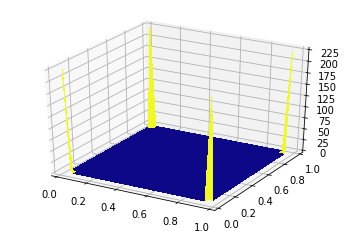

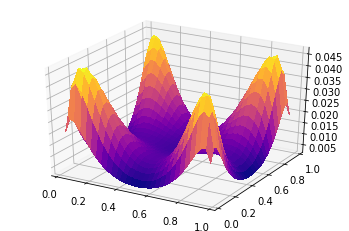

In [36]:
# Forslag til svar på Oppgave c
n=30
Delta_t=0.01

M=genM(n,Delta_t)
L=cholesky(M)

U0=genU0(n)

U1 = substit(L,U0)
U2 = substit(L,U1)
U3 = substit(L,U2)

surfplot(U0)
surfplot(U3)

plt.show()

In [50]:
#Svar på kontrollspørsmål 2
Z=np.reshape(U3,(n,n))
print('Kontrollspm 2:',Z[14,15])

#Svar på kontrollspørsmål 3
n=30
numsteps=10
print('\nSvar på Kontrollspørsmål 3')
print('Antall addisjoner og multiplikasjoner i faktoriseringen:', np.int(1/6*(n**3-n)))
print('Antall addisjoner og multiplikasjoner i substitusjonene:',np.int(numsteps*n*(n-1)))
print('Totalt: ',np.int(1/6*(n**3-n)+numsteps*n*(n-1)))

Kontrollspm 2: 0.007711171792055969

Svar på Kontrollspørsmål 3
Antall addisjoner og multiplikasjoner i faktoriseringen: 4495
Antall addisjoner og multiplikasjoner i substitusjonene: 8700
Totalt:  13195


**SUPPLERTE FUNKSJONER**

In [5]:
def genM(n,Delta_t):
    Delta_x = 1./(n+1)
    r=Delta_t/Delta_x**2
    ee=np.ones((n,))
    B=(1+4*r)*np.diag(ee)-r*np.diag(ee[1:],-1)-r*np.diag(ee[1:],1)
    In=np.diag(ee)
    Fn=np.diag(ee[1:],1)
    Gn=np.diag(ee[1:],-1)
    M=np.kron(In,B)-r*np.kron(Fn,In)-r*np.kron(Gn,In)
    return M


def genU0(n):
    p=n**2/4
    Z0=np.zeros((n,n))
    Z0[n-1,0]=p
    Z0[0,n-1]=p
    Z0[0,0] = p
    Z0[n-1,n-1]=p
    U0 = np.reshape(Z0,(n**2,1))
    return U0

def surfplot(U):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    n2=U.shape[0]
    n=int(np.sqrt(n2))
    if n2 != n**2:
        print('Antall elementer i U må være et kvadrattall\n')
        return
    Delta_x=1/(n+1)
    xx=np.linspace(Delta_x,1-Delta_x,n)
    yy=np.linspace(Delta_x,1-Delta_x,n)
    X,Y = np.meshgrid(xx,yy)
    Z = np.reshape(U,(n,n))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=False)
    plt.show()
    return surf